# IMPORTANT
This notebook runs off of the kernel for the Visualizations_Colby notebook, you MUST run all cells in that notebook before running this notebook and connect the Kernels.

## Final Project Submission

Please fill out:
* Student name: Noah Hunsicker, Colby Gates
* Student pace: Full time
* Scheduled project review date/time: 
* Instructor name: Praveen Gowtham
* Blog post URL: 

# Recommending Airplanes to Purchase by Minimizing Risk

# Goals

Our task was to identify airplanes for the buisness to purchased based on which planes we identified as having the lowest risk to the company. There are many ways to interpret this question whether that be minimizing financial risk, maximizing aircraft longeviety, or the option that we chose, minimizing the risk to passengers in the event of an incident or accident occuring on board. 

To answer this question we will parse the relevant data, isolate varibles that are most useful for identifying which airplanes are best at 
keeping passengers alive, and then these applying statistics to our dataset to discover which airplanes perform the best.

# Data

The data that we are using for our analysis comes from a kaggle [dataset](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) which is taken from the National Transportation Safety Board. This dataset contains information on aircraft incidents and accidents in the United States dating back to 1962. This dataset takes the form of a CSV that we converted to a pandas dataframe for an easier time cleaning and manipulating the data. For full documentation on the data cleaning process refrence the Data_Exploration_Cleaning jupyter notebook in the notebooks folder. After the data was cleaned we exported it to a new CSV for manipulation, statistical aggregation, and use in tableau. 

# Methods

## Make and Model

Before we dive into the methodology we used for identifying planes that are best at keeping passengers safe in the event of an incident or accident it is important to note why we chose this metric over other potential metrics that one may think are better suited at answering a broad question such as "how do we minimize risk".

The first metric we considered was a figuring out which planes have the least incidents and accidents as those planes should be considered the least risky. The problem with this is that our dataset does not contain data on ALL flights taken by each aircraft, just data on events that happen on aircrafts. This means that we have no way of knowing which airplanes have more accidents than others, just data on the outcomes of accidents when they do happen. If we had data on how many flights took place for each make and model in the given time frame we could have made this analysis, but with what we had it was not possible.

The second metric that we considered was using a net cost function based on all of the factors that we had to try to come up with a overall monetary cost of each plane crashing based on a [model](https://www.nlr.org/wp-content/uploads/2019/10/App-11-NLR-9-CR-2008-307.pdf) origionally put out by the Netherlands Air Transport Safety Institute. However this model requires us to have the cost of each craft, the insurance value of each craft, the cost of a closure at the airport that has to deal with the recovery from the accident, and the amount of damage that the aircraft sustained, which was not contained in our dataset.

This led us to approaching the question from an angle centered around minimizing injury as we have data on the severity of injury for each event. At first we were measuring which airplanes were best at keeping passengers uninjured, but we dicided that it was more important to focus on minimizing major and fatal injuries as minor injuries, while unfortunate, do not outweigh the need to prevent death and permanent injury.  

To find this value for each plane we created a new variable calculating the passengers per flight which was equal to the sum of the major injury, minor injury, fatal injury, and uninjured columns combined. Then we constructed a variable equal to the number of major injuries plus the number of fatal injuries in each event. Finally we divided the number of major and fatal injuries by the number of passengers to get the percent of passengers seriously injured or killed. We then grouped our data by each model of plane and sorted by percent of passengers with serious and fatal injuries to find the best and worst planes. 

## Additional Metrics

## Engine

The first of these additional metrics that we chose to investigate was engine type, as we hypothesized different engine types could affect plane safety in the event of an accident or incident. We had already constructed our measurement variable as was outlined previously in this document, so all we had to do was group our data by engine type and sort our data by percent of passengers with serious or fatal injuries. We also performed this calculation for number of engines as looking at both engine type and number gives us a better picture of how important engine specifications are for airplane safety.

## Location

The next metric we looked at was location, as there are many reasons to believe that the area you are flying over has an effect on the number of serious and fatal injuries sustained in the event of an accident. We chose to group this by states as our data had information on what state the plane was flying over at the time of the incident. Not only do different states have different weather conditions, geographical conditions, and atmospheric conditions that can affect the performance of a plane, but you also have to consider the developmental conditions of the area you are flying over in the event of an emergency. For example if you are flying over a sparsely populated area with the nearest airport being hundreds of miles away then your options in the event of an emergency landing become much worse than if you were flying near a major airport that could accomidate an emergency landing. The process that we used to extract the state information from the location information is also in the Data_Exploration_cleaning jupyter notebook. Once we had this information we applied the same groupby and sorting process that we used for the other metrics to find which states are best to be flying over in the event of an accident.

## Weather

While the general climate of the area is important to consider for plane safety, the current weather conditions at the time of the incident are also important to examine, as the presence of incliment weather can mess with a plane's ability to navigate safely. The dataset had information on if there were visual meteorological conditions,  conditions shown on instrumentation, or unknown weather conditions at the time of the event. We sorted these by the same way that we did for the other variables.

## Purpose of Flight

The purpose of the flight is also important to consider as it can help us recommend specific ventures to avoid for being too risky, and it can help us to identify ventures to pursue for being safer. As with the other metrics, we grouped and sorted the data by percent of passengers with serious and fatal injuries to find which ventures are safest and which are the most dangerous.

## Phase of Flight

The final metric we looked at was the phase of flight that the event took place in. Now this metric differs from the others due to the fact that all flights go through all of these phases so we can't exactly recommend to avoid one phase or another. What we can do is find out which phases of flight have the worst outcomes for passengers and recommend additional safety protocols be put in place for these phases in an attempt to improve major and fatal accident rates for them. We applied the same grouping and sorting procedure to this metric as we did all the others.

# Results

## Make and Model

First, we will be examining the results of our make and model analysis as that is the primary metric we are looking at in order to make our recommendation. We already imported our data and the required libraries for analysis earlier in this notebook so we will be going right into it.

(0.0, 12.0)

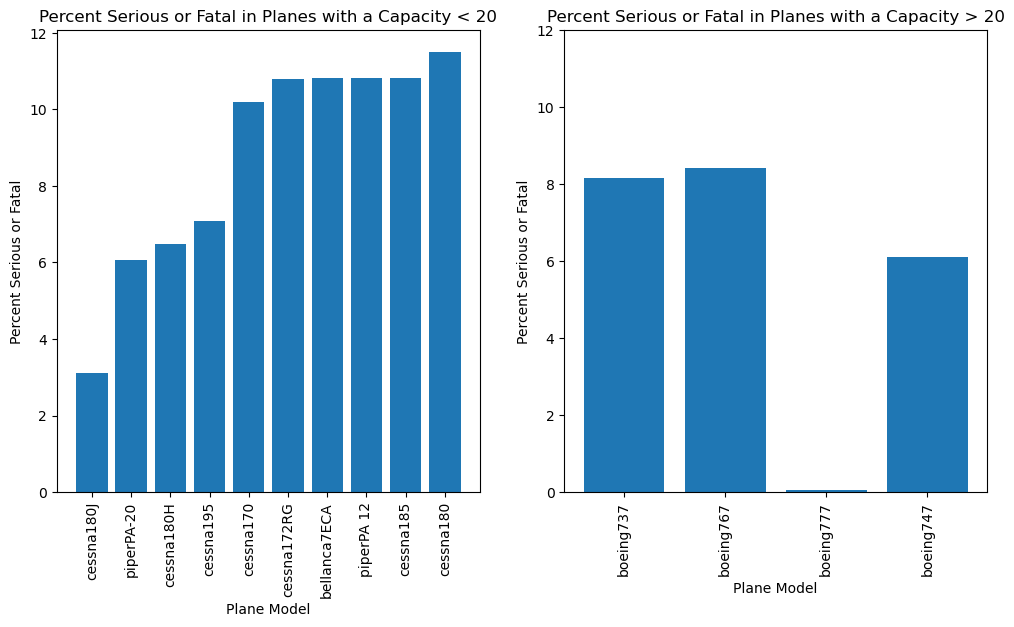

In [63]:
# This code creates a 2 plot subplot representing the percent of passengers sustaining serious or fatal injuries per plane, separated by
#small (max capacity < 20) and large (max capacity > 20) airplanes, and then displays the top 10 most safe for each category (top 4 for large)
x1 = top_ten_small_planes_model
y1 = top_ten_small_planes_percmajor

x2 = list(by_model_final_over_20.index)
y2 = list(by_model_final_over_20['Percent.Serious.and.Fatal'])

fig, ax = plt.subplots(1, 2, figsize = (12,6))

# Plot data

ax[0].bar(x1, y1)
ax[1].bar(x2, y2)

# Customize appearance
ax[0].tick_params(axis="x", labelrotation=90)
ax[0].set_ylabel('Percent Serious or Fatal')
ax[0].set_xlabel("Plane Model")
ax[0].set_title("Percent Serious or Fatal in Planes with a Capacity < 20") 
ax[1].tick_params(axis="x", labelrotation=90)
ax[1].set_ylabel("Percent Serious or Fatal")
ax[1].set_xlabel("Plane Model")
ax[1].set_title("Percent Serious or Fatal in Planes with a Capacity > 20") 
plt.ylim(0,12)

In [64]:
#this calls a dataframe that indexes off of the make and model of the plane, contains information for max capacity, mean of percent of passengers
#seriously or fatally injured, mean of percent of passengers uninjured, and the number of times each model shows up in our cleaned data, and
#is sorted by mean percent of passengers seriously or fatally injured.
make_model_mean_percentuninj

Max.Capacity  Percent.Serious.and.Fatal  Percent.Uninjured  \
Make.Model                                                                     
boeing777                  442                   0.066079          97.268606   
cessna180J                   6                   3.125000          89.062500   
piperPA-20                   4                   6.060606          89.393939   
boeing747                  539                   6.093990          93.853696   
cessna180H                   6                   6.476190          80.952381   
...                        ...                        ...                ...   
cessna421C                   8                  49.122807          50.000000   
beechV35                     4                  52.000000          41.428571   
piperPA34                    7                  57.175325          38.636364   
air tractorAT502             2                  61.111111          33.333333   
piperPA25                    2                  86.666667          13.333333   

                  Counts.Per.Model  
Make.Model                          
boeing777                       41  
cessna180J                      32  
piperPA-20                      33  
boeing747                       37  
cessna180H                      35  
...                            ...  
cessna421C                      38  
beechV35                        35  
piperPA34                       44  
air tractorAT502                36  
piperPA25                       30  

[140 rows x 4 columns]

Our analysis of plane makes and models showed that the best plane for keeping passengers not seriously injured or dead in the event of a accident or incident is the boeing 777, with an average of only .066% of passengers being seriously or fatally injured in the event of an accident or incident. This is far and away the best plane that we have for overall safety of passengers as the next best plane, the Cessna 180J, jumps up to an average of 3.125% of passengers seriously or fatally injured. 

While we could just recommend the Boeing 777, this would be a questionable business decision as the 777 is massive at a max capacity of 442 passengers which makes it incapable of being used in most general applications. This is the reason that we decided to split our data by airplane capacity and recommend some larger airplanes and some smaller airplanes for general applications. Another reason to make this split is the cost of the Boeing 777 is around 440 million dollars which may be cost prohibitive for a company just getting into the airplane industry. For these reasons it is important for us to also mention smaller aircraft that have a low rate of serious and fatal injury in the event of an accident or incident. 

The best of the small planes when it comes to serious and fatal injury rate is the Cessna 180J, with a 3.125% average rate of serious or fatal injury in the event of a incident or accident. If you look at the top 10 for small planes, you can see that the Cessna 180H and regular Cessna 180 are also represented here which gives you different specification options for similar makes of aircraft.

## Engine

Next we will be looking at the results for how engine type and number of engines affect major and fatal injury rates in an event of an accident or incident.

Text(0.5, 1.0, 'Percent Serious or Fatal by Engine Type')

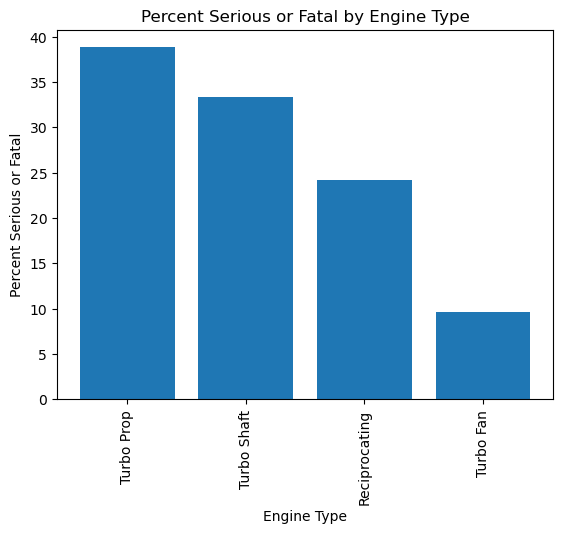

In [65]:
#this code creates a plot of serious and fatal injury rate by engine type
x = list(engine_type.index)
y = list(engine_type['Percent.Serious.and.Fatal'])
fig, ax = plt.subplots()

# Plot data
ax.bar(x, y)

# Customize appearance
ax.tick_params(axis="x", labelrotation=90)

ax.set_ylabel("Percent Serious or Fatal")

ax.set_xlabel('Engine Type')

ax.set_title("Percent Serious or Fatal by Engine Type")

In [66]:
engine_type

Percent.Serious.and.Fatal  Percent.Uninjured
Engine.Type                                                
Turbo Prop                     38.805153          55.733252
Turbo Shaft                    33.333333          33.333333
Reciprocating                  24.176204          66.701063
Turbo Fan                       9.682887          89.415767

The turbo fan engine is the clear winner for best engine type when it comes to preventing serious and fatal injuries in the event of an accident or incident with the next best engine type having a 2.5 times worse rate. 

In [67]:
df_boeing = df_trimmed[df_trimmed['Make.Model'] == 'boeing777']
df_boeing['Engine.Type']

44548      Unknown
57144    Turbo Fan
60507          NaN
65701    Turbo Fan
65828    Turbo Fan
65846          NaN
66041          NaN
68209          NaN
68350          NaN
69319    Turbo Fan
69871          NaN
70508          NaN
70817          NaN
71076          NaN
71307          NaN
72986          NaN
73754          NaN
77736          NaN
78210          NaN
78956    Turbo Fan
79194          NaN
79405    Turbo Fan
79827          NaN
80043          NaN
80306          NaN
80485          NaN
80961          NaN
81280          NaN
82139          NaN
82540          NaN
83288          NaN
83738          NaN
84431          NaN
86532          NaN
86928          NaN
87001          NaN
87415          NaN
89364          NaN
89752          NaN
90049          NaN
90062          NaN
Name: Engine.Type, dtype: object

This is interesting, it looks like there are only turbo fan engines and nans present for engine type for events with the Boeing 777, and upon a quick internet [search](https://www.geaerospace.com/propulsion/commercial/ge9x), we confirm that all Boeing 777s use turbofan engines. This makes sense that the safest plane has the safest engine and makes us even more confident in our recommendation of the Boeing 777. Lets see what it looks like for all the other large aircraft.

In [68]:
df_small = df_trimmed[df_trimmed['Max.Capacity'] > 20]
df_small['Engine.Type'].value_counts()

Engine.Type
Turbo Fan    64
Unknown       5
Turbo Jet     1
Name: count, dtype: int64

It looks like its not just the Boeing 777 that uses a turbo fan engine, its almost all of the large aircraft in the data. But what about the best small aircraft that we looked at while examining make and model data?

In [69]:
df_trimmed[df_trimmed['Make.Model'] == 'cessna180J']['Engine.Type']

613      Reciprocating
1921     Reciprocating
2128     Reciprocating
2672     Reciprocating
56687    Reciprocating
57042    Reciprocating
57298    Reciprocating
59415    Reciprocating
60196    Reciprocating
61154    Reciprocating
66518    Reciprocating
67178    Reciprocating
68522    Reciprocating
70012    Reciprocating
70394    Reciprocating
70941    Reciprocating
71681    Reciprocating
72474    Reciprocating
73742    Reciprocating
74127    Reciprocating
74283    Reciprocating
76234    Reciprocating
76486    Reciprocating
76920    Reciprocating
77440    Reciprocating
81132    Reciprocating
87387    Reciprocating
87392    Reciprocating
87717    Reciprocating
87731    Reciprocating
88312              NaN
89636    Reciprocating
Name: Engine.Type, dtype: object

When we look at the engine type for the best small plane from our make and model analysis we see that the Cessna 180J uses a reciprocating engine, which is the second best engine type when it comes to preventing serious or fatal injuries. There seems to be a high correlation between good planes and good engines.

Text(0.5, 1.0, 'Percent Serious or Fatal by Engine Number')

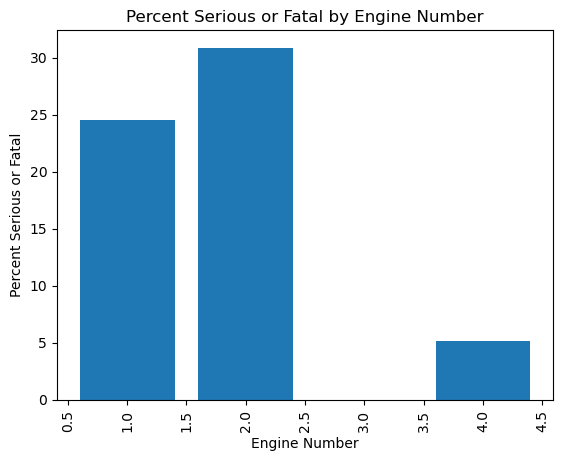

In [70]:
engine_num.sort_values(by = 'Percent.Uninjured')

x = list(engine_num.index)
y = list(engine_num['Percent.Serious.and.Fatal'])
fig, ax = plt.subplots()

# Plot data
ax.bar(x, y)

# Customize appearance
ax.tick_params(axis="x", labelrotation=90)

ax.set_ylabel("Percent Serious or Fatal")

ax.set_xlabel('Engine Number')

ax.set_title("Percent Serious or Fatal by Engine Number")

When we look at engine number we get another example of large planes being better than small ones, with planes with 4 engines well outperforming planes with 2 or 1 engine. When we get into regression we will learn to control for these similarities to try to isolate which of these effects has the greatest impact on preventing major injury and death.

We did consider using the string contains method to filter to see if engine failure was present in the report status, but as we can see when we pull up the values for report status, there is no consistent language that is used in the reports that could let us parse through it and find all cases of engine failure.

In [71]:
df_trimmed['Report.Status'].value_counts()

Report.Status
Probable Cause                                                                                                                                                                                                                                                                                                                                                           3047
Foreign                                                                                                                                                                                                                                                                                                                                                                    66
The pilot's failure to maintain directional control during the landing roll.                                                                                                                                                                                  

If there were and the term "engine failure" was required to be present in the reports of all cases involving engine failure the code to parse it would look like:

In [72]:
df_trimmed['Report.Status'].str.contains("engine failure")

17       False
18       False
20       False
21       False
29       False
         ...  
90303      NaN
90305      NaN
90316      NaN
90324      NaN
90332      NaN
Name: Report.Status, Length: 11376, dtype: object

## Location

The next variable we looked at was location, specifically separating on a state by state basis to find which states had the best condidions for preventing major injury and death, as well as looking at which states appeared most often in our data

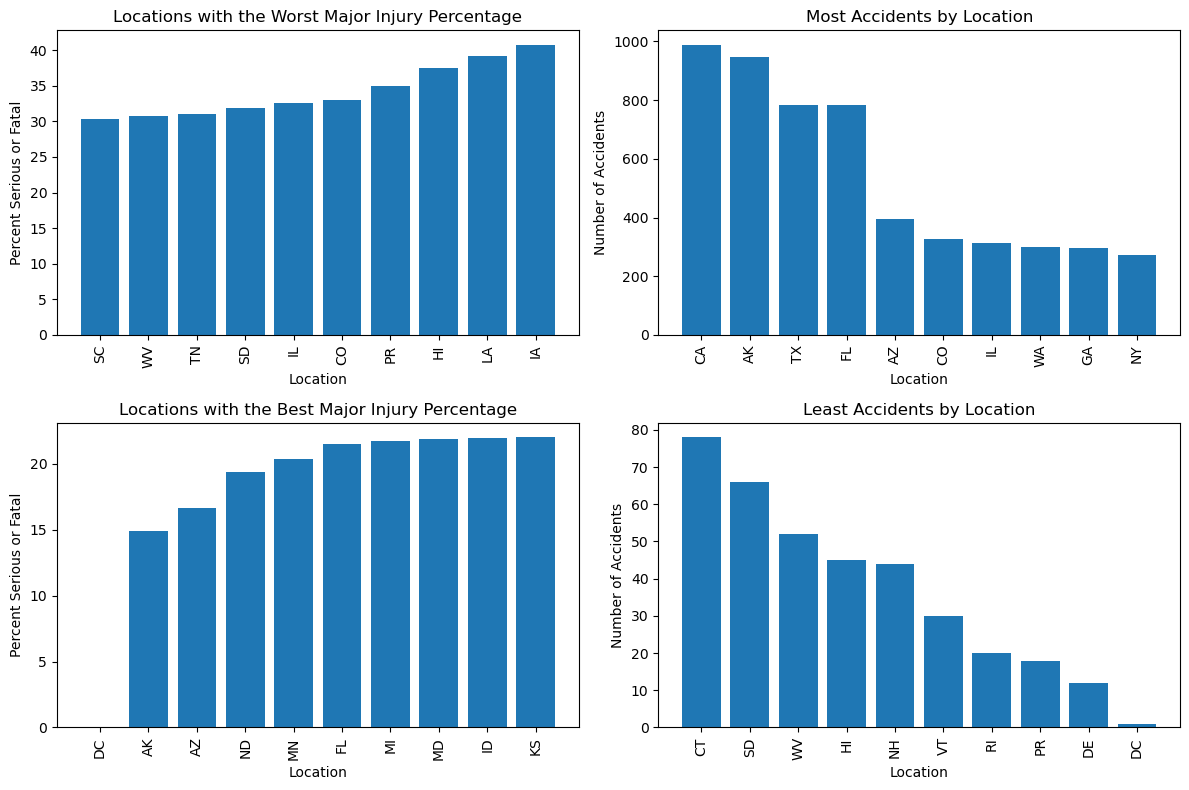

In [73]:
x1 = list(location_of_flight.index)[:10]
y1= list(location_of_flight['Percent.Serious.and.Fatal'])[:10]

y2 = list(df_location['Location'].value_counts())[:10]
x2 = list(df_location['Location'].value_counts().index)[:10]

x3 = list(location_of_flight.index)[-10:]
y3= list(location_of_flight['Percent.Serious.and.Fatal'])[-10:]

y4 = list(df_location['Location'].value_counts())[-10:]
x4 = list(df_location['Location'].value_counts().index)[-10:]

fig, ax = plt.subplots(2,2, figsize = (12,8))

# first graph
ax[1][0].bar(x1, y1)

ax[1][0].tick_params(axis="x", labelrotation=90)

ax[1][0].set_ylabel("Percent Serious or Fatal")

ax[1][0].set_xlabel('Location')

ax[1][0].set_title("Locations with the Best Major Injury Percentage")

# second graph
ax[0][1].bar(x2, y2)

ax[0][1].tick_params(axis="x", labelrotation=90)

ax[0][1].set_ylabel("Number of Accidents")

ax[0][1].set_xlabel('Location')

ax[0][1].set_title("Most Accidents by Location")


# third graph
                       
ax[0][0].bar(x3, y3)

ax[0][0].tick_params(axis="x", labelrotation=90)

ax[0][0].set_ylabel("Percent Serious or Fatal")

ax[0][0].set_xlabel('Location')

ax[0][0].set_title("Locations with the Worst Major Injury Percentage")

# second graph
ax[1][1].bar(x4, y4)

ax[1][1].tick_params(axis="x", labelrotation=90)

ax[1][1].set_ylabel("Number of Accidents")

ax[1][1].set_xlabel('Location')

ax[1][1].set_title('Least Accidents by Location')

fig.tight_layout()

When we look at the locations with the best rate of preventing serious injury or death in the event of an accident or incident we have Washington D.C with a perfect record for preventing major injury and death in the event of an incident or accident. At first you might think that this might be due to one of the factors that we talked about in our methods section such as the infrastructure or natural features of the area, but if you dig deeper you can find a better reason for this. 

In [74]:
df_trimmed[df_trimmed['Location'] == 'DC']

Event.Id Investigation.Type  Event.Date Location Latitude  \
3416  20020917X04340           Incident  1982-12-05       DC      NaN   

     Longitude Injury.Severity Aircraft.damage   Make  Number.of.Engines  ...  \
3416       NaN        Incident           Minor  piper                2.0  ...   

     Total.Uninjured Weather.Condition  Broad.phase.of.flight   Report.Status  \
3416             4.0               VMC                Landing  Probable Cause   

      Num.Passenger  Total.Injured Percent.Serious.and.Fatal  \
3416            4.0            0.0                       0.0   

     Percent.Uninjured      Make.Model  Max.Capacity  
3416             100.0  piperPA-23-250             7  

[1 rows x 25 columns]

There is only 1 data point that is in DC, and the reason for this is that there is a [17 mile restricted flight space](https://www.faa.gov/newsroom/restricted-airspace-0) surrounding the DC area due to the fact that most of the US federal government is contained in this area, making it a target for potential air attacks. This means that we can skip this data point as if we did recommend that we start flying routes over DC for safety, we would provoke the airforce to shoot our planes out of the sky.

The next best location that we have is Alaska, but again, it would be not great to recommend flights that fly over Alaska due to the fact that the only place that you would fly over Alaska to get to is Russia, with would also not be a great idea as this airspace is also restricted.

But when you look at the rest of the top 10 you can see that there is a group of states that would make a good flight route, if you connect Michigan, Minnesota, Idaho , North Dakota you get a good group of states that could be used for a Midwest to Pacific North airline. You would have to add in Montana, Wisconsin, and Washington, but as we can see when we look at their serious and fatal injury rate, neither of these are a major issue to include.

In [75]:
location_of_flight[location_of_flight.index == 'MT']

Percent.Serious.and.Fatal  Percent.Uninjured
Location                                              
MT                        25.111857          65.659955

In [76]:
location_of_flight[location_of_flight.index == 'WI']

Percent.Serious.and.Fatal  Percent.Uninjured
Location                                              
WI                        22.991968          64.538153

In [77]:
location_of_flight[location_of_flight.index == 'WA']

Percent.Serious.and.Fatal  Percent.Uninjured
Location                                              
WA                        22.463768          68.366778

As a bonus, this would create an airline with access to 3 major airport hubs with MSP in Minnesota, DTW in Michigan, and SEA in Washington. 

## Weather

For our weather we don't have to do as much work as we did with the other variables as there are only two different values that we have to compare

Text(0.5, 1.0, 'Percent Serious or Fatal by Weather Condition')

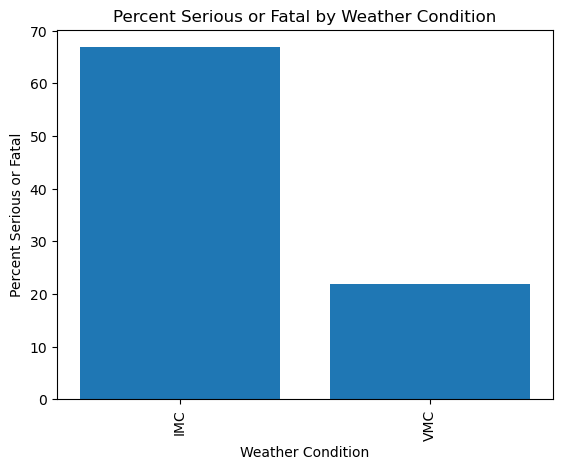

In [78]:
#Bar graph by weather condition

x = list(weather_condition.index)
y = list(weather_condition['Percent.Serious.and.Fatal'])
fig, ax = plt.subplots()

# Plot data
ax.bar(x, y)

# Customize appearance
ax.tick_params(axis="x", labelrotation=90)

ax.set_ylabel("Percent Serious or Fatal")

ax.set_xlabel('Weather Condition')

ax.set_title("Percent Serious or Fatal by Weather Condition")

In [79]:
weather_condition

Percent.Serious.and.Fatal  Percent.Uninjured
Weather.Condition                                              
IMC                                66.797131          23.951785
VMC                                21.970551          68.789256

To get a better picture of what this data means we have to find the real meaning of IMC (Instrument Meteorological Conditions) vs VMC (Visual Meteorological Conditions). According to the Federal Air Administration, [VMC](https://www.faa.gov/air_traffic/publications/atpubs/pcg_html/glossary-v.html#:~:text=VISUAL%20METEOROLOGICAL%20CONDITIONS%2D%20Meteorological%20conditions,(See%20INSTRUMENT%20FLIGHT%20RULES.)) means the weather is good enough for pilots to be able to navigate visually, and [IMC](https://www.faa.gov/air_traffic/publications/atpubs/pcg_html/glossary-i.html#$INSTRUMENT%20METEOROLOGICAL%20CONDITIONS) means that weather conditions are bad enough that pilots should be navigating by their instruments instead of visually. 

Knowing this, we can interpret the data much better. We can see that there is a much lower average rate of major or fatal injuries when the pilot is flying under visual meteorological conditions compared to when they are flying under instrument meteorological conditions. All this is saying is that flying in good weather is better than flying in bad weather

## Purpose of Flight

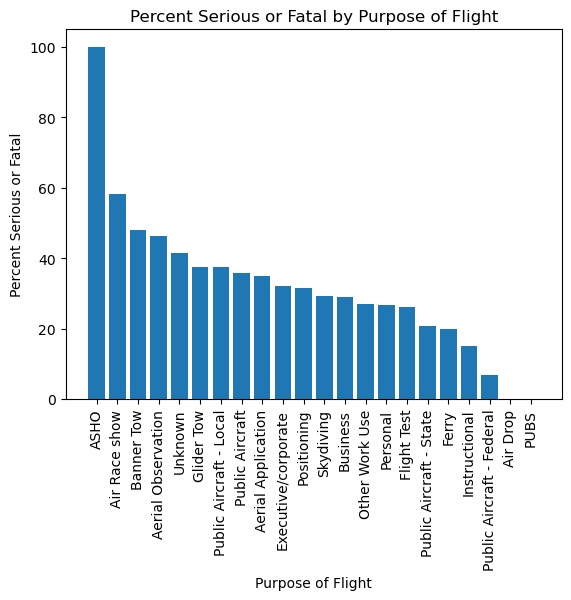

In [80]:
x = list(purpose_of_flight.index)
y = list(purpose_of_flight['Percent.Serious.and.Fatal'])
fig, ax = plt.subplots()

#Plot data
ax.bar(x, y)

#Customize appearance
ax.tick_params(axis="x", labelrotation=90)

ax.set_ylabel("Percent Serious or Fatal")

ax.set_xlabel('Purpose of Flight')

ax.set_title("Percent Serious or Fatal by Purpose of Flight")

plt.show()

In [81]:
purpose_of_flight

Percent.Serious.and.Fatal  Percent.Uninjured
Purpose.of.flight                                                      
ASHO                                      100.000000           0.000000
Air Race show                              58.333333          41.666667
Banner Tow                                 47.959184          47.959184
Aerial Observation                         46.212121          44.191919
Unknown                                    41.497392          48.583560
Glider Tow                                 37.500000          54.166667
Public Aircraft - Local                    37.500000          62.500000
Public Aircraft                            35.714286          64.285714
Aerial Application                         34.905660          53.773585
Executive/corporate                        32.037037          61.111111
Positioning                                31.542056          60.747664
Skydiving                                  29.206820          65.666598
Business                                   28.849951          61.994135
Other Work Use                             26.959064          54.561404
Personal                                   26.679097          63.218943
Flight Test                                26.000000          70.000000
Public Aircraft - State                    20.833333          75.000000
Ferry                                      20.000000          66.000000
Instructional                              15.045814          78.420221
Public Aircraft - Federal                   6.944444          76.388889
Air Drop                                    0.000000         100.000000
PUBS                                        0.000000          66.666667

Looking at this data we can see that we should be avoiding going into a wide variety of endeavors as there are a lot of flight purposes that have an over 30% average major or fatal injury rate. There are also some endeavors that we can rule out due to them being impossible for us, namely being a public aircraft, which gets rid PUBS, Public Aircraft - Federal, and Public Aircraft - State. This leaves a few great candidates that we can recommend, including flight instruction and business.

## Phase of Flight

The final variable that we are looking at is the broad phase of flight that the event occured in.

Text(0.5, 1.0, 'Percent Serious or Fatal by Broad Phase of Flight')

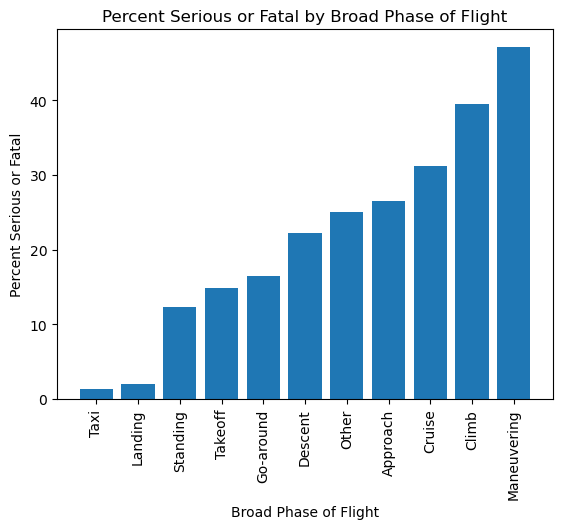

In [82]:
x = list(broad_phase_of_flight.index)
y = list(broad_phase_of_flight['Percent.Serious.and.Fatal'])
fig, ax = plt.subplots()

# Plot data
ax.bar(x, y)

# Customize appearance
ax.tick_params(axis="x", labelrotation=90)

ax.set_ylabel("Percent Serious or Fatal")

ax.set_xlabel('Broad Phase of Flight')

ax.set_title("Percent Serious or Fatal by Broad Phase of Flight")

In [83]:
broad_phase_of_flight

Percent.Serious.and.Fatal  Percent.Uninjured
Broad.phase.of.flight                                              
Taxi                                    1.349206          95.912698
Landing                                 2.072997          90.198175
Standing                               12.307692          74.871795
Takeoff                                14.875445          69.501779
Go-around                              16.515152          65.965909
Descent                                22.194093          56.253767
Other                                  25.000000          37.500000
Approach                               26.539855          51.835749
Cruise                                 31.219418          52.133295
Climb                                  39.473684          41.228070
Maneuvering                            47.138470          36.909548

As was mentioned in the methods section, this final recommendation isn't the same as the others as we can't simply tell pilots not to go into the climbing phase of flight. Instead, we can look for what phases of flight have the highest rate of major or fatal injuries in the case of an accident and task airplane safety experts with coming up with protocols to improve the major injury and death rate average for planes in that phase of flight. The worst offenders in this list are climbing, manuvering, and cruising, each with higher than 30% rate of serious or fatal injury in the event of an accident. 

However, when we look at the best makes and models that we recommended, we can see that this problem disappears as there are no cases of major injury or death during manuvering or climbing for any of the Boeing 700 series, the Cessna 180J and Cessna 180H, or the Piper PA 20.

In [85]:
#this shows the serious and fatal injury rate by phase of flight for Boeing planes
broad_phase_of_flight_boeing

Percent.Serious.and.Fatal  Percent.Uninjured
Broad.phase.of.flight                                              
Standing                                0.000000         100.000000
Takeoff                                 0.000000           0.000000
Taxi                                    0.000000         100.000000
Cruise                                  0.460829          99.539171
Descent                               100.000000           0.000000

In [86]:
#same as last cell but for the cessna 180J
broad_phase_of_flight_cessna180J

Percent.Serious.and.Fatal  Percent.Uninjured
Broad.phase.of.flight                                              
Approach                                     0.0              100.0
Landing                                      0.0               70.0
Takeoff                                      0.0              100.0

In [87]:
#same for the cessna 180H
broad_phase_of_flight_cessna180H

Percent.Serious.and.Fatal  Percent.Uninjured
Broad.phase.of.flight                                              
Cruise                                       0.0           0.000000
Landing                                      0.0          66.666667
Taxi                                         0.0         100.000000
Takeoff                                     12.0          40.000000

In [89]:
#Same for the Piper PA 20
broad_phase_of_flight_piperPA

Percent.Serious.and.Fatal  Percent.Uninjured
Broad.phase.of.flight                                              
Landing                                      0.0              100.0
Maneuvering                                  0.0              100.0
Takeoff                                      0.0              100.0
Taxi                                         0.0              100.0
Cruise                                     100.0                0.0

# Recommendation 1

If you are buying a large plane, get one with 4 turbo fan engines. if you are buying a small plane, buy aircraft with one reciprocating engine.

# Recommendation 2

Create an airline connecting the Upper Midwest to the Pacific Northwest and establish your flight hubs at MSP, DTW, and SEA

# Recommendation 3

When you purchase large aircraft, the Boeing 777 is your best bet but the other Boeing 700 series planes are also near the best you can get for safety. When you buy smaller aircraft, go for the Cessna 180 series, specifically the Cessna 180J, or if you need even smaller, go with the Piper PA 20.